In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Actually making graphs look nice

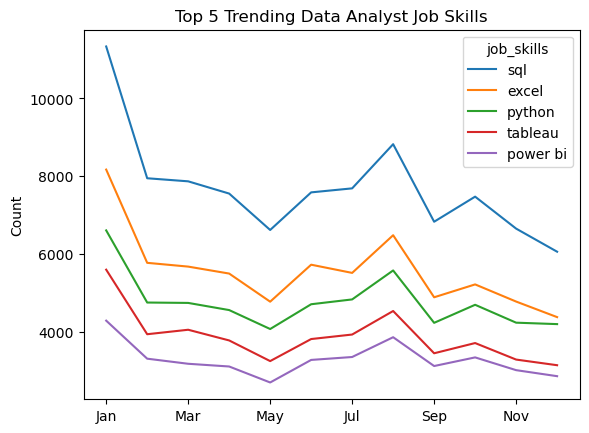

In [2]:
### Data preparation -  this is already done and commented out in section 12(?)

# Create new column for job posted month #
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode job_skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Sort skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
# print(df_DA_pivot.columns)
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no', errors='ignore') # was freaking out before adding errors=ignore

# Get top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Trending Data Analyst Job Skills')
plt.xlabel('')
plt.ylabel('Count')
plt.show()


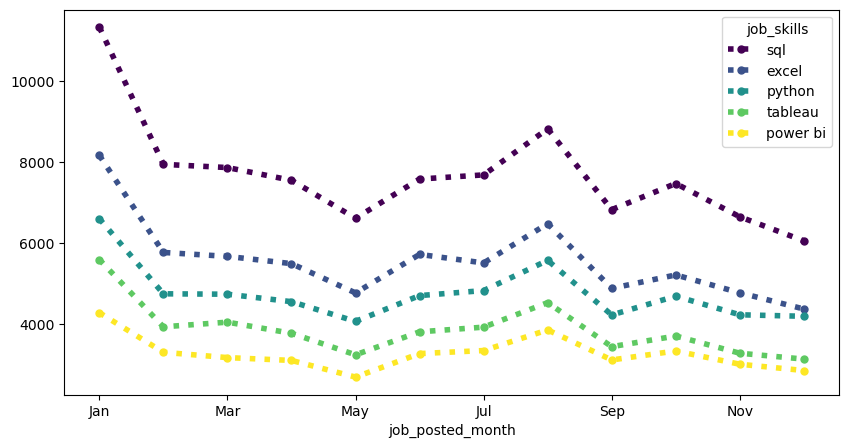

In [3]:
#df_DA_pivot

### Now to customize appearance of line chart

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # Options: '-', '--', '-.', ':'
    colormap='viridis', # Options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    markersize=5,
    marker='o', # Options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', etc...
    figsize=(10, 5)
)
plt.show()

In [7]:
# Using this df from earlier

skill_stats = df_DA_explode.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to top skills
skill_count = 20
skill_stats=skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


In [ ]:
### This is the package we will be using to make scatter plots look pretty in matplotlib

from adjustText import adjust_text

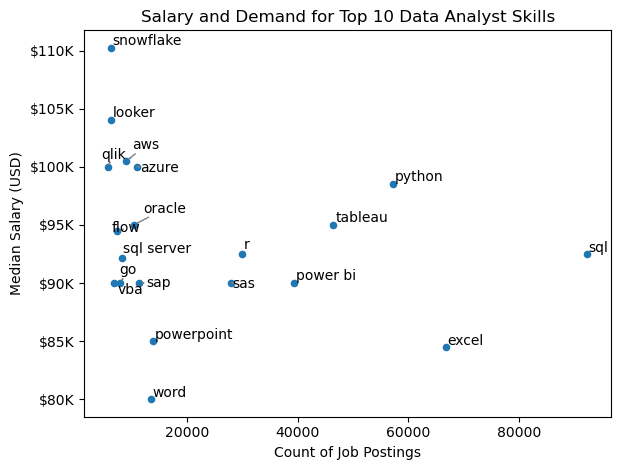

In [13]:


# Partially pulled from section 15

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary (USD)')
plt.title('Salary and Demand for Top 10 Data Analyst Skills')
plt.tight_layout()


# This is different for adjustText package
texts = [] # Creating an empty list

# Scatter plot in matplotlib doesn't really label the points itself
    # For now, we use the workaround below
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], # Appending this line for text to the list above
                          skill_stats['median_salary'].iloc[i], txt)) 


# Here we use adjust texts on the text portion of the plot
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

# This needs to be done after creating the plot
    # This allows us to change y axis labeling
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()